<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 5</h1>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from hyperopt import tpe, hp, fmin
from hyperopt.pyll.stochastic import sample
from tensorflow.keras import layers, activations

2025-06-24 16:32:04.833815: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-24 16:32:04.850599: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-24 16:32:04.871495: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750775524.955905   81909 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750775525.007914   81909 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750775525.068098   81909 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

<h1 style="color: blue; font-size:50px;"> Esercizio 1 - Ottimizzazione Bayesana</h1>

L’ottimizzazione bayesiana è una tecnica di ottimizzazione usata per trovare il massimo (o minimo) di una funzione obiettivo costosa da valutare e senza una forma analitica nota, cioè una black-box function. Per svolgere questo esercizio verrà utilizzata la libreria **Hyperopt**, pensata per l'ottimizzazione automatica di funzioni.

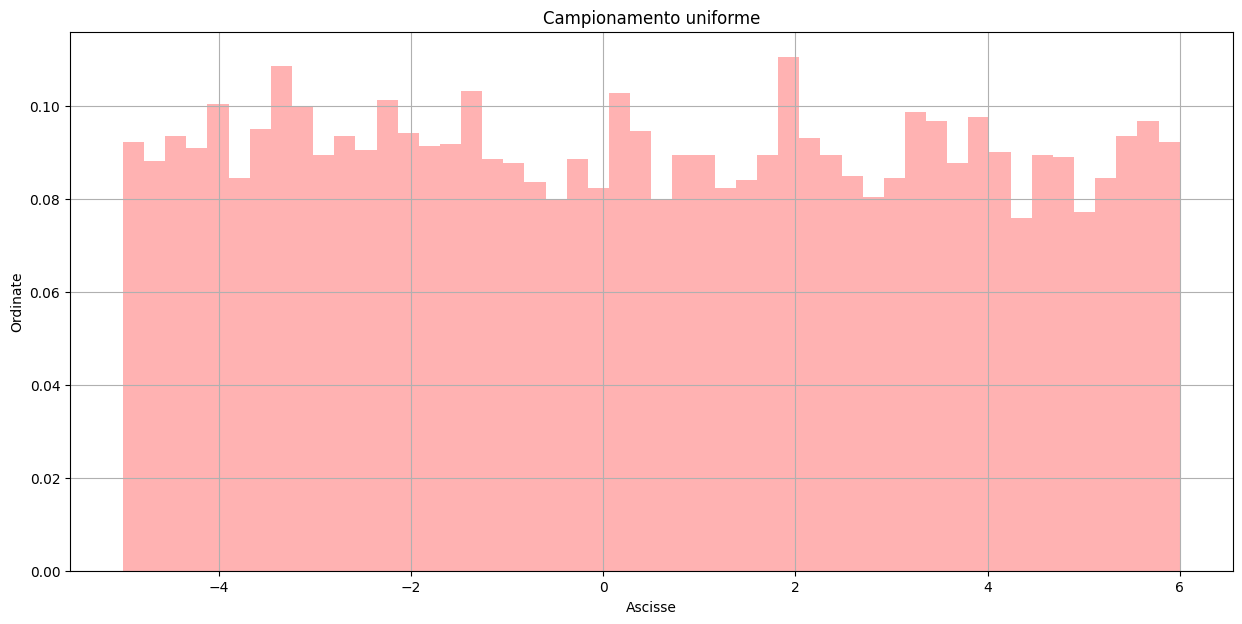

100%|██████████| 2000/2000 [00:58<00:00, 34.09trial/s, best loss: -219.80113010906686]
Miglior valore dell'iperparametro:  4.877377345640654


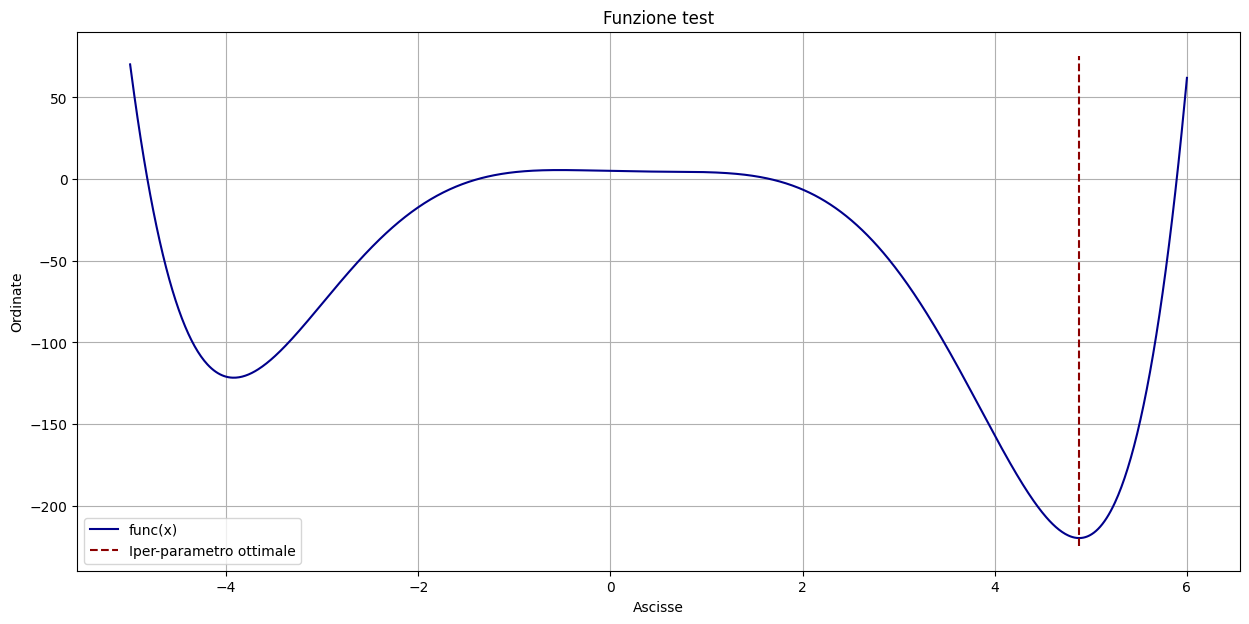

In [11]:
def func(x):
    # Polinomio f(x) = 0.05 * (x^6 - 2x^5 - 28x^4 + 28x^3 + 12x^2 - 26x + 100)
    p = np.poly1d([1, -2, -28, 28, 12, -26, 100])
    return p(x) * 0.05

def plotF(x, minV):
    # Funzione per plottare target

    y = func(x)         # Calcolo funzione
    fig = plt.figure(figsize = (15, 7))
    plt.plot(x, y, color = 'darkblue', label = "func(x)")
    plt.plot(np.array([minV, minV]), np.array([min(y)-5, max(y)+5]), color = 'darkred', linestyle = '--', label = "Iper-parametro ottimale")
    plt.title("Funzione test")
    plt.ylabel("Ordinate")
    plt.xlabel("Ascisse")
    plt.legend(loc = 'best')
    plt.grid(True)
    plt.show()

def plotHist(x, nbins):
    # Funzione per plottare campionamento uniforme
    fig = plt.figure(figsize = (15, 7))
    plt.hist(x, bins = nbins, range = (min(x), max(x)), density = True, color = (1, 0, 0, 0.3))
    plt.title("Campionamento uniforme")
    plt.ylabel("Ordinate")
    plt.xlabel("Ascisse")
    plt.grid(True)
    plt.show()


# Definiamo ora un dominio di ricerca uniforme utilizzando hyperopt
# Facciamo sampling di questo dominio e facciamo un istogramma
space = hp.uniform('x', -5, 6)
plotHist([sample(space) for _ in range(10000)], 50)


# Procediamo con la minimizzazione della funzione obiettivo, ossia func(x), utilizzando il modello TPE. Le 
# valutazioni della funzione stessa sono 2000. 
minV = fmin(
    fn=func,                # Funzione obiettivo da ottimizzare
    space=space,            # Spazio dell'iperparametro, in cui sarà cercato il valore ottimale
    algo=tpe.suggest,       # Algoritmo di ottimizzazione
    max_evals=2000          # Tentativi di ottimizzazione della funzione
)
print("Miglior valore dell'iperparametro: ", minV['x'])

# Valuto funzione polinomiale su un intervallo di punti equispaziati fra [-5, 6]
# Evidenzio come la previsione dell'ottimizzazione coincida effettivamente con il minimo della funzione
x = np.linspace(-5, 6, 1000)
plotF(x, minV['x'])